In [1]:
import os
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

In [41]:
def convert_to_minus180_180(da):
    """
    Convert an xarray.DataArray from [0, 360] longitudes to [-180, 180].
    """
    da = da.assign_coords(lon=(((da.lon + 180) % 360) - 180))
    return da.sortby(da.lon)

# Sample DataArray with [0, 360] longitudes
data = xr.DataArray([1, 2, 3], coords=[('lon', [0, 120, 300])])

def convert_to_0_360(da):
    """
    Convert an xarray.DataArray from [-180, 180] longitudes to [0, 360].
    """
    da = da.assign_coords(longitude=(da.longitude % 360))
    return da.sortby(da.longitude)

<xarray.DataArray 'param9.6.209' (time: 1, alt: 1, lat: 3500, lon: 7000)>
[24500000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2015-05-16T21:00:00
  * lon      (lon) float64 230.0 230.0 230.0 230.0 ... 300.0 300.0 300.0 300.0
  * lat      (lat) float64 54.99 54.98 54.97 54.96 ... 20.03 20.02 20.01 20.0
  * alt      (alt) float64 0.0


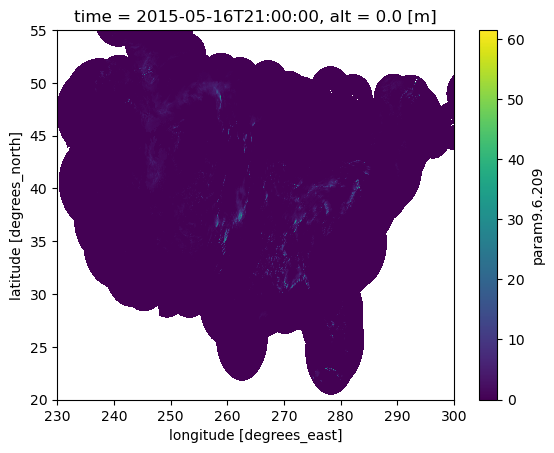

In [46]:
mrms_path = '/home/yl241/data/CLIMATE/nexrad_min_0.2/'
d = xr.open_dataarray(mrms_path + 'GaugeCorr_QPE_01H_00.00_20150516-210000.nc')
print(d)
d.plot()
plt.show()

<xarray.DataArray 'param9.6.209' (time: 1, alt: 1, lat: 3500, lon: 7000)>
[24500000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2015-05-16T21:00:00
  * lon      (lon) float64 -130.0 -130.0 -130.0 -130.0 ... -60.02 -60.01 -60.0
  * lat      (lat) float64 54.99 54.98 54.97 54.96 ... 20.03 20.02 20.01 20.0
  * alt      (alt) float64 0.0


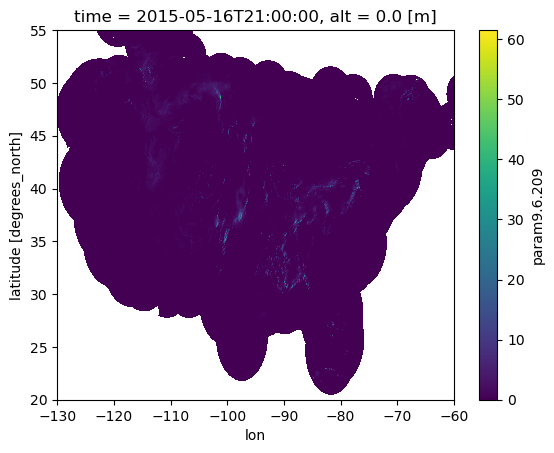

In [50]:
# convert coordinates
d.coords['lon'] = (d.coords['lon'] + 180) % 360 - 180
d = d.sortby(d.lon)
print(d)
d.plot()
plt.show()

<xarray.DataArray 't2m' (latitude: 101, longitude: 241)>
[24341 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -65.5 -65.25 -65.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... 25.5 25.25 25.0
    time       datetime64[ns] 2015-05-16T21:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature


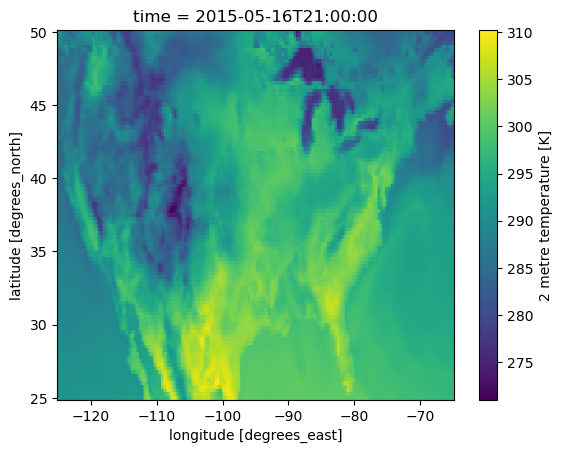

In [15]:
# load corresponding surface temperature
surf_temp = xr.open_dataarray("/home/yl241/data/CLIMATE/ERA5/single_level/2m_temperature_2015.nc")
one_day = surf_temp.sel(time='2015-05-16-T21:00:00.000000000')
print(one_day)
one_day.plot()
plt.show()

<xarray.DataArray 't2m' (latitude: 3500, longitude: 7000)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    time       datetime64[ns] 2015-05-16T21:00:00
  * latitude   (latitude) float64 54.99 54.98 54.97 54.96 ... 20.02 20.01 20.0
  * longitude  (longitude) float64 -130.0 -130.0 -130.0 ... -60.02 -60.01 -60.0
Attributes:
    units:      K
    long_name:  2 metre temperature


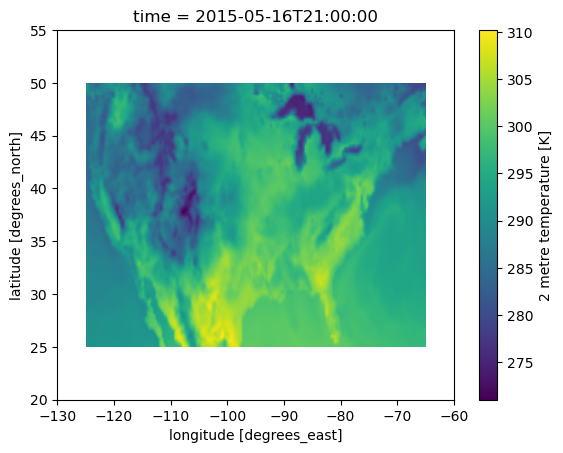

In [52]:
# interpolaote
one_day_interp = one_day.interp(latitude=d['lat'].values, longitude=d['lon'].values)
print(one_day_interp)
one_day_interp.plot()
plt.show()

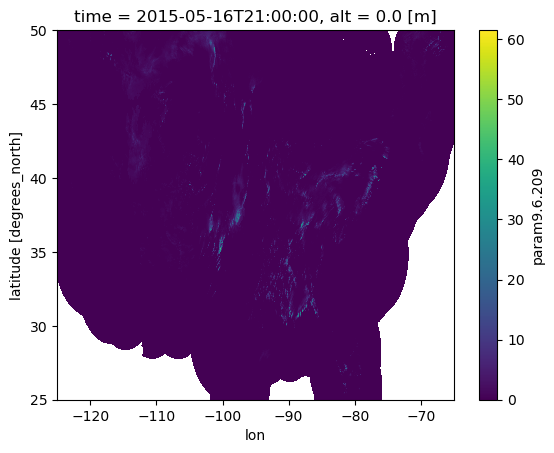

In [60]:
# select a region
d_cropped = d.sel(lat=slice(50, 25), lon=slice(-125, -65))
d_cropped.plot()
plt.show()